In [1]:
import pandas as pd
import numpy as np

sonata = pd.read_csv("/content/drive/MyDrive/machine_learning/SONATA.csv")
sonata.head()

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-11-03 09:15:00+05:30,370.549988,374.450012,369.500000,372.750000,0,0.0,0
1,2025-11-03 10:15:00+05:30,372.750000,373.600006,371.549988,372.600006,25782,0.0,0
2,2025-11-03 11:15:00+05:30,372.950012,373.799988,372.399994,373.049988,16760,0.0,0
3,2025-11-03 12:15:00+05:30,373.049988,373.899994,372.799988,372.799988,16982,0.0,0
4,2025-11-03 13:15:00+05:30,372.700012,373.500000,371.899994,373.000000,39286,0.0,0


In [2]:
data = sonata[["Open", "High", "Low", "Close"]]
data.head()

,Open,High,Low,Close
0,370.549988,374.450012,369.500000,372.750000
1,372.750000,373.600006,371.549988,372.600006
2,372.950012,373.799988,372.399994,373.049988
3,373.049988,373.899994,372.799988,372.799988
4,372.700012,373.500000,371.899994,373.000000


In [3]:
# Preprocessing the data to be between 0, 1
from sklearn.preprocessing import MinMaxScaler
from joblib import dump

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
dump(scaler, '/content/drive/MyDrive/machine_learning/models/min_max_scaler.joblib')
scaled_data.shape

(280, 4)

In [ ]:
# moving window of 12H for predicting the stock movemnt for the next hour
window_size = 12
X = []
y = []

for i in range(window_size, len(data)):
  X.append(scaled_data[i-window_size:i])
  y.append(scaled_data[i])

X = np.array(X)
y = np.array(y)

X.shape, y.shape

((268, 12, 4), (268, 4))

In [ ]:
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Input(shape=X.shape[1:]),
    keras.layers.LSTM(units=128, return_sequences=True),
    keras.layers.Dropout(0.2),
    keras.layers.LSTM(128),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(4),
])

model.compile(optimizer='adam', loss='mean_squared_error')
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 12, 128)        │        68,096 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 200,196 (782.02 KB)

 Trainable params: 200,196 (782.02 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X, y, epochs=200, batch_size=32, validation_split=0.1)

predictions = model.predict(X)
predictions = scaler.inverse_transform(predictions)
y_true = scaler.inverse_transform(y)

rmse = np.sqrt((y_true-predictions)**2)
print(f"rmse: {rmse}")

Epoch 1/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - loss: 0.0920 - val_loss: 0.0146
Epoch 2/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0176 - val_loss: 0.0140
Epoch 3/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0179 - val_loss: 0.0142
Epoch 4/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0146 - val_loss: 0.0085
Epoch 5/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0109 - val_loss: 0.0088
Epoch 6/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 0.0116 - val_loss: 0.0080
Epoch 7/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0112 - val_loss: 0.0078
Epoch 8/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0097 - val_loss: 0.0079
Epoch 9/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0104 - val_loss: 0.0078
Epoch 10/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 0.0099 - val_loss: 0.0078
Epoch 11/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0085 - val_loss: 0.0074
Epoch 12/200
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - loss: 0.0109 - val_l

In [ ]:
predictions.shape, y.shape, X[-1].shape

((268, 4), (268, 4), (12, 4))

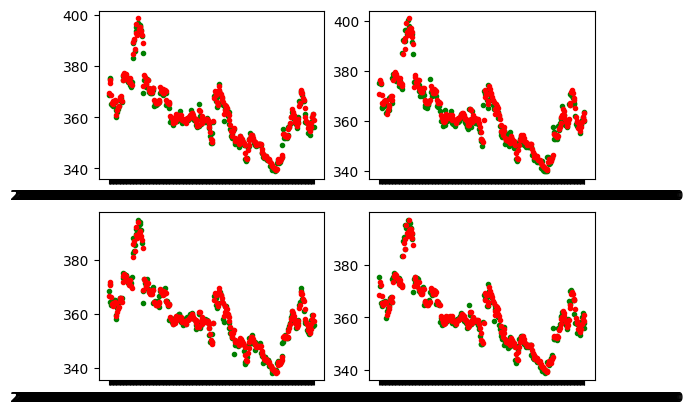

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 2)

ax[0, 0].plot(sonata.Datetime[window_size:], y_true[:, 0], '.g')
ax[0, 0].plot(sonata.Datetime[window_size:], predictions[:, 0], '.r')

ax[0, 1].plot(sonata.Datetime[window_size:], y_true[:, 1], '.g')
ax[0, 1].plot(sonata.Datetime[window_size:], predictions[:, 1], '.r')

ax[1, 0].plot(sonata.Datetime[window_size:], y_true[:, 2], '.g')
ax[1, 0].plot(sonata.Datetime[window_size:], predictions[:, 2], '.r')

ax[1, 1].plot(sonata.Datetime[window_size:], y_true[:, 3], '.g')
ax[1, 1].plot(sonata.Datetime[window_size:], predictions[:, 3], '.r')

plt.show()

In [ ]:
model.save("/content/drive/MyDrive/machine_learning/models/finstreet_new.keras")

In [ ]:
# loading the model
model = keras.models.load_model("/content/drive/MyDrive/machine_learning/models/finstreet_new.keras")
y_new = model.predict(X[-1:, :, :])
x_merged = np.concatenate((X[-1:, 1:, :], y_new.reshape(1, y_new.shape[0], y_new.shape[1])), axis=1)
x_merged.shape

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


(1, 12, 4)